In [2]:
pip install config

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance (1).csv


In [7]:

!pip install config
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import config

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
raw_data = pd.read_csv("insurance.csv")

In [12]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
df1 = raw_data
df1['sex'] = label.fit_transform(raw_data['sex'])
df1['smoker'] = label.fit_transform(raw_data['smoker'])
df1['region'] = label.fit_transform(raw_data['region'])
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [13]:
data = df1
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [14]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,10)})
g = sns.pairplot(data)

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fdfbfa6a7a0> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fdfbfa72290> (for post_execute):


KeyboardInterrupt: ignored

In [15]:
X = data.drop('smoker', axis = 1).values
y = data['smoker']

y = y.astype(int)

print(X.shape)
print(y.shape)

(1338, 6)
(1338,)


In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

In [17]:
dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [18]:
#Improtance 
fi_col = []
fi = []

for i,column in enumerate(raw_data.drop('smoker', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for age is : 0.05446714266988006
The feature importance for sex is : 0.0
The feature importance for bmi is : 0.11679874440680948
The feature importance for children is : 0.011166785745168342
The feature importance for region is : 0.0
The feature importance for charges is : 0.8175673271781421


In [19]:
# Creating a Dataframe
fi_col
fi

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df


# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

# Creating columns to keep
columns_to_keep = fi_df['Feature'][0:40]

fi_df

,index,Feature,Feature Importance
0,5,charges,0.817567
1,2,bmi,0.116799
2,0,age,0.054467
3,3,children,0.011167
4,1,sex,0.000000
5,4,region,0.000000


In [20]:
data.drop(['region','sex'],axis = 1)
#d1 = data.drop([5], inplace = True)
X = data.drop('smoker', axis = 1).values

In [21]:
# first one
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)

# Second one
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(963, 6)
(268, 6)
(107, 6)
(963,)
(268,)
(107,)


In [23]:
log_reg = LogisticRegression(random_state=10, solver = 'lbfgs')

log_reg.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [24]:
# Methods we can use in Logistic

# predict - Predict class labels for samples in X
log_reg.predict(X_train)
y_pred = log_reg.predict(X_train)

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(X_train)
print("pred_proba: ", pred_proba)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

# score- Returns the mean accuracy on the given test data and labels - below

pred_proba:  [[7.12809629e-01 2.87190371e-01]
 [9.98780923e-01 1.21907688e-03]
 [9.93743617e-01 6.25638343e-03]
 ...
 [9.91280966e-01 8.71903415e-03]
 [9.96007205e-01 3.99279471e-03]
 [9.99323078e-01 6.76921675e-04]]


array([[-0.07636912,  0.14611577, -0.17506904, -0.20504958,  0.27136915,
         0.00035122]])

In [25]:
# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))



The Training Accuracy is:  0.936656282450675
The Testing Accuracy is:  0.9664179104477612


In [26]:
n=3

In [27]:
drop_clusters = data.drop('Clusters', axis = 1).values

KeyError: ignored

In [28]:
from sklearn.cluster import KMeans
kmeans=KMeans(3)
x=data[['charges','age']]


In [29]:
kmeans.fit(x)
identified_clusters=kmeans.fit_predict(x)
identified_clusters

array([2, 1, 1, ..., 1, 1, 0], dtype=int32)

In [ ]:
data_with_clusters=data
data_with_clusters['Clusters']=identified_clusters


In [1]:
data_with_clusters['name Clusters']= data_with_clusters['Clusters']
data_with_clusters['name Clusters']= data_with_clusters['Clusters'].apply(str)
data_with_clusters['name Clusters']= data_with_clusters['name Clusters'].map({'0':'low_charges','1':'hig_charges','2': 'Med_charges'})

NameError: ignored

In [ ]:
data_with_clusters

,age,sex,bmi,children,smoker,region,charges,Clusters,name Clusters
0,19,0,27.900,0,1,1,16884.92400,2,Med_charges
1,18,1,33.770,1,0,2,1725.55230,0,low_charges
2,28,1,33.000,3,0,2,4449.46200,0,low_charges
3,33,1,22.705,0,0,3,21984.47061,2,Med_charges
4,32,1,28.880,0,0,3,3866.85520,0,low_charges
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830,0,low_charges
1334,18,0,31.920,0,0,0,2205.98080,0,low_charges
1335,18,0,36.850,0,0,2,1629.83350,0,low_charges
1336,21,0,25.800,0,0,1,2007.94500,0,low_charges


In [ ]:
data_with_clusters.info()

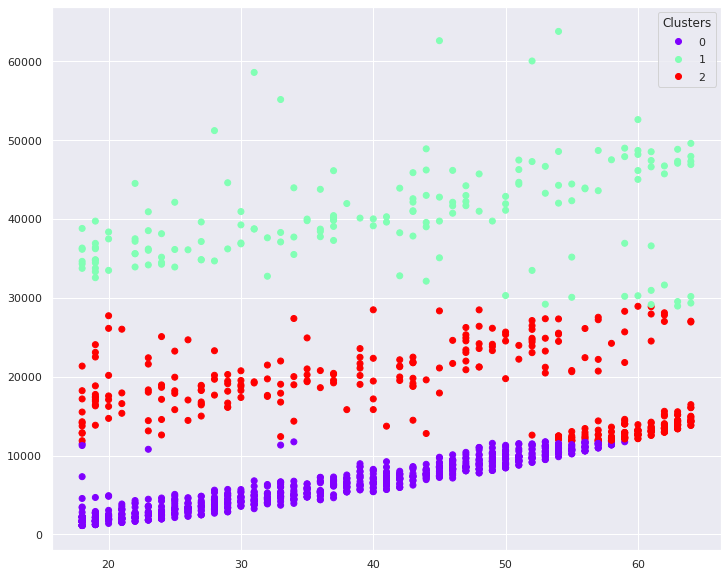

In [ ]:
fig, ax = plt.subplots()
scatter=plt.scatter(data_with_clusters['age'],data_with_clusters['charges'], c=data_with_clusters['Clusters'], cmap='rainbow')

legend1 = ax.legend(*scatter.legend_elements(),
                     title="Clusters")

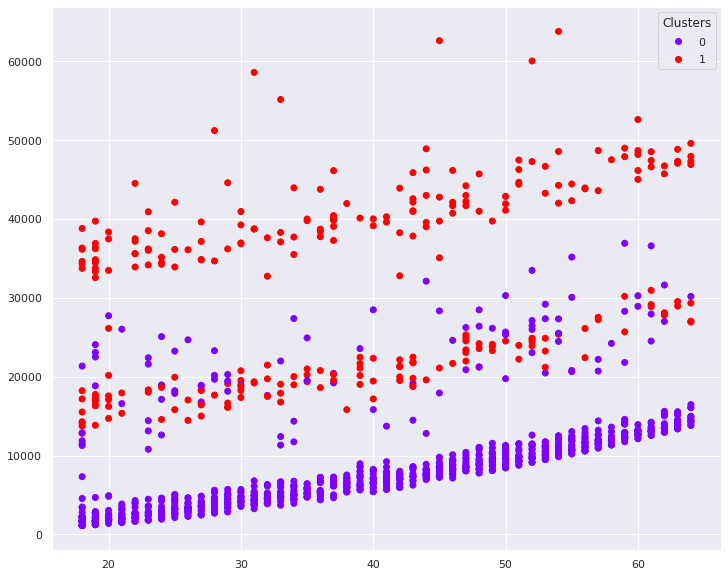

In [ ]:
fig, ax = plt.subplots()
scatter=plt.scatter(data_with_clusters['age'],data_with_clusters['charges'], c=data_with_clusters['smoker'], cmap='rainbow')

legend1 = ax.legend(*scatter.legend_elements(),
                     title="Clusters")

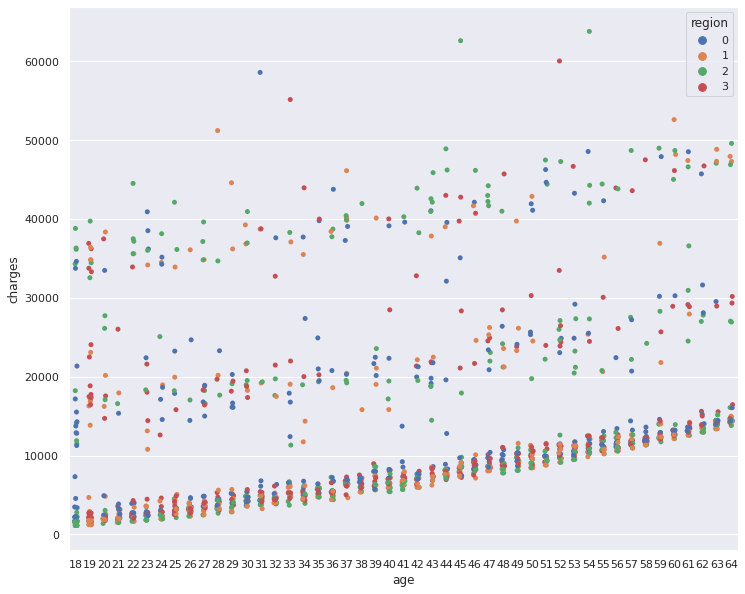

In [ ]:
sns.stripplot(x=data_with_clusters['age'], y=data_with_clusters['charges'], hue=data_with_clusters['region'],size=5)

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gmm = GaussianMixture(n_components=3)
gmm.fit(x)
x

In [ ]:
print(gmm.means_)
print('\n')
print(gmm.covariances_)

In [ ]:

identified_clusters=gmm.fit_predict(x)
data_with_clusters2=data
data_with_clusters2['Clusters2']=identified_clusters

In [ ]:
data_with_clusters2['name Clusters2']=data_with_clusters2['Clusters2']
data_with_clusters2['name Clusters2']=data_with_clusters2['Clusters2'].apply(str)
data_with_clusters2['name Clusters2']= data_with_clusters2['name Clusters2'].map({'0':'low_charges','1':'hig_charges','2': 'Med_charges'})

In [ ]:
data_with_clusters

In [ ]:
fig, ax = plt.subplots()
scatter=plt.scatter(data_with_clusters['age'],data_with_clusters['charges'], c=data_with_clusters['Clusters'], cmap='rainbow')

legend1 = ax.legend(*scatter.legend_elements(),
                     title="Clusters")